# ANN From Scratch Using Backpropagation Algorithm

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10.0,8.0)

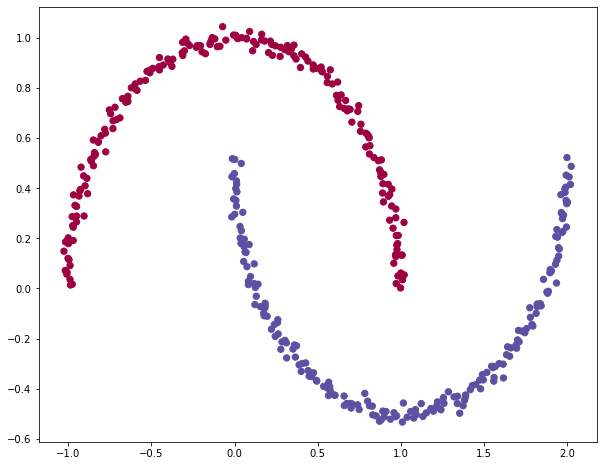

In [10]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(400, noise=0.02)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [11]:
X.shape

(400, 2)

In [12]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [13]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

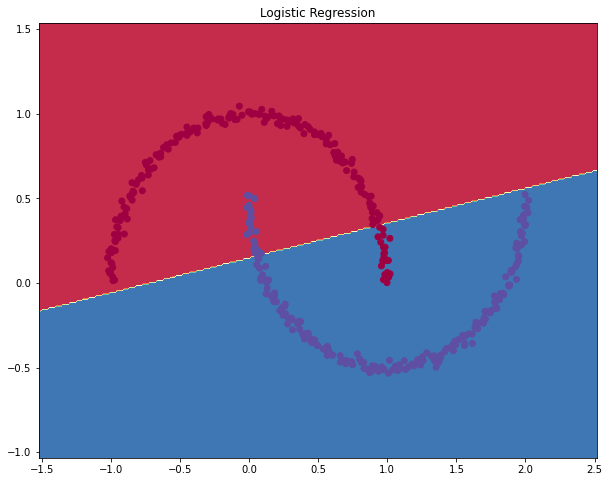

In [14]:
plot_decision_boundary(lambda x: clf.predict(x)) # lambda is used instead of return.
plt.title("Logistic Regression")

# Defiene ANN Hyper Parameters

In [15]:
n = len(X)
nn_input_dim = 2
nn_output_dim = 2
lr = 0.001
#reg = 0.01 # REGULARIZER

In [16]:
def cal_loss(model):
    w1,b1,w2,b2 = model['w1'],model['b1'],model['w2'],model['b2']
    z1 = X.dot(w1)+b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2)+b2
    a2 = np.exp(z2)
    # NOTE: Outputs Prob, Sigmoid - Output layer
    prob = a2/np.sum(a2, axis=1, keepdims=True)
    #Calculate the loss
    correct_logprob = -np.log(prob[range(n),y]) # Cross Entropy Loss
    data_loss = np.sum(correct_logprob)
    # ADD REGULARIZATION TO LOSS
    #data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./n* data_loss    

In [17]:
def predict(model,x):
    w1,b1,w2,b2 = model['w1'],model['b1'],model['w2'],model['b2']
    z1 = x.dot(w1)+b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2)+b2
    a2 = np.exp(z2)
    prob = a2 / np.sum(a2, axis=1, keepdims=True)
    return np.argmax(prob, axis=1)

In [18]:
def build_model(nn_hdim, epochs=10000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    w1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    w2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    model = {}
    # Gradient Descent
    for i in range(0,epochs):
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        a2 = np.exp(z2)
        prob = a2 / np.sum(a2, axis=1, keepdims=True)
        
        #Backpropagation
        delta3 = prob
        delta3[range(n),y]-=1
        #delta3[range(num_example), y] is 
        #selecting lines of the matrix delta3 ranging from 0 to num_examples 
        #but only selecting column y.
        # probs is the vector of class probabilities (computed in a forward pass via softmax).
        # delta3 is the error signal from the loss function.
        #y holds the ground truth classes for the mini-batch.
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        #dW2 += reg_lambda * W2
        #dW1 += reg_lambda * W1

        # Gradient descent parameter update ==>w_new = W-old-lr*dC
        w1 += -lr * dW1
        b1 += -lr * db1
        w2 += -lr * dW2
        b2 += -lr * db2
        
        # Assign new parameters to the model
        model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, cal_loss(model)))
    
    return model

In [19]:
# Build a model with a 3-dimensional hidden layer
model = build_model(100, print_loss=True)

Loss after iteration 0: 0.591393
Loss after iteration 1000: 0.007163
Loss after iteration 2000: 0.002968
Loss after iteration 3000: 0.001805
Loss after iteration 4000: 0.001276
Loss after iteration 5000: 0.000978
Loss after iteration 6000: 0.000788
Loss after iteration 7000: 0.000657
Loss after iteration 8000: 0.000561
Loss after iteration 9000: 0.000489


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

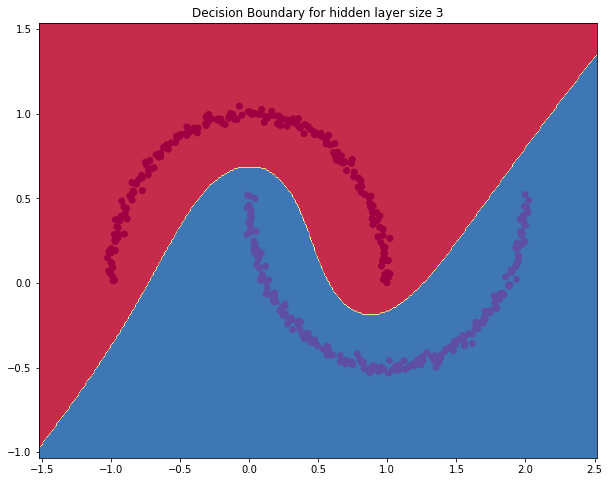

In [20]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [21]:
model

{'w1': array([[ 1.35058561,  0.53206746,  0.57177391,  2.2550834 ,  2.66456683,
         -0.57930619,  0.52668524,  0.15157826, -0.29652917,  0.29757681,
          0.08267158,  1.04330993,  0.53842937,  0.05303047,  0.53613557,
          0.34576975,  1.08635656,  0.11159911, -0.41582164, -0.52860022,
         -3.24570701,  0.53258316,  0.53265577, -0.53631174,  3.22053866,
         -0.97404876,  0.37526837, -0.51203119,  1.43258425,  1.24476349,
          0.51998613,  0.42331352, -0.729878  , -1.86746968, -0.32920156,
         -0.5119571 ,  1.1802244 ,  0.61977559, -0.53864111,  0.47628416,
         -0.92848934, -2.13398387, -1.90725273,  2.14033527, -0.55782579,
         -0.53064589, -1.22658945,  0.46994086, -1.34622525, -0.1657646 ,
         -0.6712115 ,  0.27931506, -0.40979271, -0.84444607, -0.36338177,
          0.54503747, -0.17544158,  0.52895841, -0.40692745, -0.425131  ,
         -0.45599183, -0.55708026, -0.52869366, -2.93217417,  0.53003035,
         -0.54539532, -1.5840256